# Purchasing Analytics

In this notebook, I will analyse the purchasing behavior of the customers.

The dataset we are going to use is a dataset of each transaction, rather than the customer from the last one.
The dataset consists of 500 individuals and their purchase of candy bars from the same store over a period of 2 years.

Here is the Legend:

![](Legend1.png)

![](Legend2.png)

We are going to look at:

1. Purchase probability - will a customer buy a product from a particular product category when they enter the shop?
2. Brand choice probability - Which brand will the pick?
3. Purchase quantity - How many units are they going to buy?

In [57]:
# Importing libraries

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [39]:
# Data import

df_purchase = pd.read_csv("purchase data.csv")

In [40]:
# Data exploration
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [41]:
# Any missing data?
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Data Segmentation

##### Import Segmentation Model

In [42]:
scaler = pickle.load(open(r'C:\Users\ml258\Python\365\Customer_analytics2\Segment_analytics\scaler.pickle', 'rb'))

pca = pickle.load(open(r'C:\Users\ml258\Python\365\Customer_analytics2\Segment_analytics\pca.pickle', 'rb'))

kmeans_pca = pickle.load(open(r'C:\Users\ml258\Python\365\Customer_analytics2\Segment_analytics\kmeans_pca.pickle', 'rb'))

In [43]:
# Standardization
# We standardize the purchase data in the same way we did the segmentation data, using the standard scaler.

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segmentation_std = scaler.transform(features)

In [44]:
# PCA
# We apply pca on the purchase data and obtain 3 principal components for each row in the table. 
df_purchase_segm_pca = pca.transform(df_purchase_segmentation_std)

### K-means PCA

In [45]:
# Based on the principal components, we use the predict method from pca to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [46]:
# Copy resulting data frame as a purchase predictors data frame. 
# We'll be changing the predictors data frame, by adding and changing columns.
# Therefore, we want to keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [47]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

### Descriptive Analysis by Segments

#### Data Analysis by Customer

In [48]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [49]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [50]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


Now we got the data of how many times a customer has visited the shop and bought a candy bar!

Now, let's calculate the average purchase frequency per individual. That's the number of times a person has visited the store divided by total number of visits by that individual.

In [51]:
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [52]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [53]:
# Which segment a customer belongs to.

temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [54]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


### Segment Proportions

We can analyse the behavior of the 4 segments.
We can step on our table and group by segments.

In [55]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


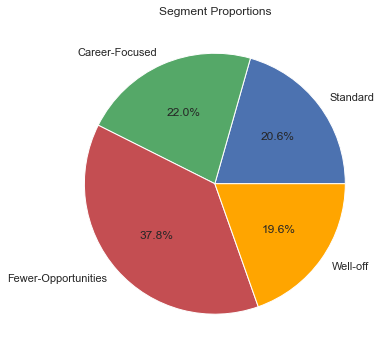

In [60]:
# Let's create a piechart


plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
    labels=['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-off'],
    autopct="%1.1f%%",
    colors=('b', 'g', 'r', 'orange'))

plt.title("Segment Proportions")
plt.show()

### Purchase Occasion and Purchase Incidence

- How often do people from different segments visit the store?
- How often do they buy candy bars?
- How often do they buy relative the their number of their store visits?

To answer these questions, we'll calculate the mean and standard diviations.
The means shows the average behavior of each segment, while the std shows spread out the data it.

In [ ]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean